## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";");
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [4]:
df["y"] = np.where(df["y"] == "yes",1,0)
df["y"] = df["y"].astype(str)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

<AxesSubplot:xlabel='age'>

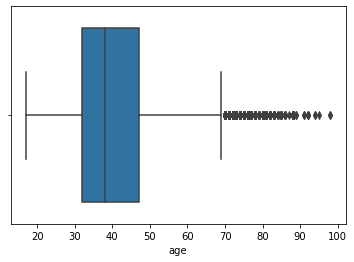

In [6]:
sns.boxplot(data=df, x="age")

## Remove the outliers

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IRQ = Q3 - Q1
IRQ

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64

In [8]:
df = df[~((df < (Q1 - 1.5*IRQ)) | (df > (Q3 + 1.5*IRQ)))]

C:\Users\RDHARM~2\AppData\Local\Temp/ipykernel_16668/3188623757.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5*IRQ)) | (df > (Q3 + 1.5*IRQ)))]


In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,NaN,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,NaN,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,NaN,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,NaN,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,NaN,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,NaN,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


<AxesSubplot:xlabel='age'>

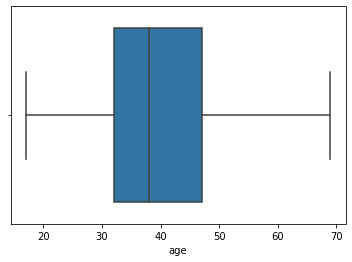

In [10]:
sns.boxplot(data=df, x="age")

## Null values handling

In [11]:
for col_name in df.columns:
    if col_name == "y":
        continue
    if df[col_name].dtypes == "object":
        df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    else:
        df[col_name] = df[col_name].fillna(df[col_name].mean())

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Binning of Ages

In [13]:
bins = [1, 5, 10, 25, 50, 100]
df["age"] = pd.cut(df["age"], bins)
df["age"] = df["age"].astype(str)

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [17]:
enc_list = []
for col_name in df.columns:
    if (col_name != "y") & (df[col_name].dtypes == "object"):
        enc_list.append(col_name)
label_encoder = LabelEncoder()

for col_name in enc_list:
    df[col_name] = label_encoder.fit_transform(df[col_name])
    
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41199 non-null  int32  
 1   job             41199 non-null  int32  
 2   marital         41199 non-null  int32  
 3   education       41199 non-null  int32  
 4   default         41199 non-null  int32  
 5   housing         41199 non-null  int32  
 6   loan            41199 non-null  int32  
 7   contact         41199 non-null  int32  
 8   month           41199 non-null  int32  
 9   day_of_week     41199 non-null  int32  
 10  duration        41199 non-null  float64
 11  campaign        41199 non-null  float64
 12  pdays           41199 non-null  float64
 13  previous        41199 non-null  float64
 14  poutcome        41199 non-null  int32  
 15  emp.var.rate    41199 non-null  float64
 16  cons.price.idx  41199 non-null  float64
 17  cons.conf.idx   41199 non-null 

## Remove Highly correlated independent variables using VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

In [21]:
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,feature,vif
0,age,1.103383
1,job,1.022459
2,marital,1.101523
3,education,1.090126
4,default,1.098944
5,housing,1.011874
6,loan,1.002719
7,contact,2.271608
8,month,1.831260
9,day_of_week,1.011441


In [22]:
df = df.drop(["pdays"], axis=1)

In [23]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,8.480986
1,job,2.118781
2,marital,5.188538
3,education,4.439607
4,default,1.388303
5,housing,2.206096
6,loan,1.207954
7,contact,2.725415
8,month,6.832614
9,day_of_week,3.089116


In [24]:
df = df.drop(["nr.employed"], axis=1)

In [25]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,8.480971
1,job,2.118173
2,marital,5.188349
3,education,4.438904
4,default,1.385746
5,housing,2.205562
6,loan,1.207893
7,contact,2.376505
8,month,5.718801
9,day_of_week,3.088604


In [26]:
df = df.drop(["cons.price.idx"], axis=1)

In [27]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,8.130448
1,job,2.104156
2,marital,5.060123
3,education,4.341254
4,default,1.384461
5,housing,2.200072
6,loan,1.207376
7,contact,2.250043
8,month,5.637480
9,day_of_week,3.058707


In [28]:
df = df.drop(["euribor3m"], axis=1)

In [29]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,7.627083
1,job,2.094704
2,marital,4.982677
3,education,4.203129
4,default,1.383777
5,housing,2.191556
6,loan,1.207002
7,contact,2.234105
8,month,5.260712
9,day_of_week,3.017614


In [30]:
df = df.drop(["cons.conf.idx"], axis=1)

In [31]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,6.205907
1,job,2.075201
2,marital,4.303272
3,education,4.043521
4,default,1.371490
5,housing,2.134917
6,loan,1.202280
7,contact,2.219933
8,month,4.751905
9,day_of_week,2.915628


In [32]:
df = df.drop(["poutcome"], axis=1)

In [33]:
x_list = []
for col_name in df.columns:
    if col_name != "y":
        x_list.append(col_name)

X = df[x_list]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["vif"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_df

C:\Users\rdharmana\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,vif
0,age,5.742084
1,job,2.065378
2,marital,4.102640
3,education,3.950966
4,default,1.370470
5,housing,2.120894
6,loan,1.201325
7,contact,2.202564
8,month,4.718694
9,day_of_week,2.873386


## Model Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
df_ind = df[vif_df["feature"]]
df_dep = df["y"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.25, random_state=0)
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
16758,1,7,0,3,0,0,2,0,3,2,187.0,1.0,0.0,1.4
8263,1,0,2,3,0,0,2,1,4,3,25.0,1.0,0.0,1.4
22970,1,0,1,6,0,2,2,0,1,1,153.0,3.0,0.0,1.4
21373,1,9,1,3,0,0,0,0,1,1,298.0,6.0,0.0,1.4
22310,1,9,1,5,1,0,0,0,1,2,68.0,1.0,0.0,1.4


In [37]:
x_train.shape

(30899, 14)

In [38]:
x_test.shape

(10300, 14)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\Users\rdharmana\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = log_reg.predict(x_test)

In [43]:
prob_pred = pd.DataFrame(log_reg.predict_proba(x_test))
prob_pred

,0,1
0,0.986653,0.013347
1,0.611479,0.388521
2,0.649457,0.350543
3,0.981626,0.018374
4,0.984727,0.015273
...,...,...
10295,0.896147,0.103853
10296,0.970932,0.029068
10297,0.978113,0.021887
10298,0.939198,0.060802


In [50]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[8964,  148],
       [1057,  131]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.8830097087378641